In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from api_key_container import api_key

In [2]:
url = "https://api.marketstack.com/v1/tickers?access_key=" + api_key
response = requests.get(url)
response_json = response.json()
print(response_json)

{'pagination': {'limit': 100, 'offset': 0, 'count': 100, 'total': 294939}, 'data': [{'name': 'Microsoft Corporation', 'symbol': 'MSFT', 'has_intraday': False, 'has_eod': True, 'country': None, 'stock_exchange': {'name': 'NASDAQ Stock Exchange', 'acronym': 'NASDAQ', 'mic': 'XNAS', 'country': 'USA', 'country_code': 'US', 'city': 'New York', 'website': 'www.nasdaq.com'}}, {'name': 'Apple Inc', 'symbol': 'AAPL', 'has_intraday': False, 'has_eod': True, 'country': None, 'stock_exchange': {'name': 'NASDAQ Stock Exchange', 'acronym': 'NASDAQ', 'mic': 'XNAS', 'country': 'USA', 'country_code': 'US', 'city': 'New York', 'website': 'www.nasdaq.com'}}, {'name': 'Amazon.com Inc', 'symbol': 'AMZN', 'has_intraday': False, 'has_eod': True, 'country': None, 'stock_exchange': {'name': 'NASDAQ Stock Exchange', 'acronym': 'NASDAQ', 'mic': 'XNAS', 'country': 'USA', 'country_code': 'US', 'city': 'New York', 'website': 'www.nasdaq.com'}}, {'name': 'Alphabet Inc - Class C', 'symbol': 'GOOG', 'has_intraday': Fa

In [3]:
response_json

{'pagination': {'limit': 100, 'offset': 0, 'count': 100, 'total': 294939},
 'data': [{'name': 'Microsoft Corporation',
   'symbol': 'MSFT',
   'has_intraday': False,
   'has_eod': True,
   'country': None,
   'stock_exchange': {'name': 'NASDAQ Stock Exchange',
    'acronym': 'NASDAQ',
    'mic': 'XNAS',
    'country': 'USA',
    'country_code': 'US',
    'city': 'New York',
    'website': 'www.nasdaq.com'}},
  {'name': 'Apple Inc',
   'symbol': 'AAPL',
   'has_intraday': False,
   'has_eod': True,
   'country': None,
   'stock_exchange': {'name': 'NASDAQ Stock Exchange',
    'acronym': 'NASDAQ',
    'mic': 'XNAS',
    'country': 'USA',
    'country_code': 'US',
    'city': 'New York',
    'website': 'www.nasdaq.com'}},
  {'name': 'Amazon.com Inc',
   'symbol': 'AMZN',
   'has_intraday': False,
   'has_eod': True,
   'country': None,
   'stock_exchange': {'name': 'NASDAQ Stock Exchange',
    'acronym': 'NASDAQ',
    'mic': 'XNAS',
    'country': 'USA',
    'country_code': 'US',
    'cit

In [4]:
companies = response_json['data']

In [5]:
df = pd.json_normalize(companies, meta=['name'])
print(df)

                                            name symbol  has_intraday  \
0                          Microsoft Corporation   MSFT         False   
1                                      Apple Inc   AAPL         False   
2                                 Amazon.com Inc   AMZN         False   
3                         Alphabet Inc - Class C   GOOG         False   
4                         Alphabet Inc - Class A  GOOGL         False   
..                                           ...    ...           ...   
95                  British American Tobacco Plc    BTI         False   
96                                    3M Company    MMM         False   
97                               Lowe`s Cos. Inc    LOW         False   
98                                    Diageo plc    DEO         False   
99  ROYAL DUTCH SHELL ADR EA REP 2 CL'B' EUR0.07  RDS.B         False   

    has_eod country      stock_exchange.name stock_exchange.acronym  \
0      True    None    NASDAQ Stock Exchange        

In [6]:
url = "https://api.marketstack.com/v1/splits?access_key=" + api_key
querystring = {"symbols":"ATVI"}
response = requests.get(url, params=querystring)
print(response.json())

{'pagination': {'limit': 100, 'offset': 0, 'count': 8, 'total': 8}, 'data': [{'date': '2008-09-08', 'split_factor': 2.0, 'symbol': 'ATVI'}, {'date': '2005-10-25', 'split_factor': 1.33, 'symbol': 'ATVI'}, {'date': '2005-03-23', 'split_factor': 1.33, 'symbol': 'ATVI'}, {'date': '2004-03-16', 'split_factor': 1.5, 'symbol': 'ATVI'}, {'date': '2003-06-09', 'split_factor': 1.5, 'symbol': 'ATVI'}, {'date': '2001-11-21', 'split_factor': 1.5, 'symbol': 'ATVI'}, {'date': '1993-10-20', 'split_factor': 0.33, 'symbol': 'ATVI'}, {'date': '1992-08-03', 'split_factor': 0.1, 'symbol': 'ATVI'}]}


In [28]:
url = "https://api.marketstack.com/v1/eod?access_key=" + api_key
querystring = {"symbols":"ATVI","date_from":"2023-12-01", "date_to":"2024-12-01"}
response = requests.get(url, params=querystring)
print(response.json())

{'pagination': {'limit': 100, 'offset': 0, 'count': 0, 'total': 0}, 'data': []}


In [24]:
historical_data = response.json()['data']
historical_data

[]

In [25]:
df = pd.json_normalize(historical_data, meta=['date'])
df

""


In [26]:
def shorten_date(date):
    return date[0:10]

df['date']
df['short_date'] = df['date'].apply(shorten_date)
df

KeyError: 'date'

In [27]:
df.plot.line('short_date', y=['adj_high', 'adj_close'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Adjusted Price (USD)')
plt.title('Microsoft EOD Data')

# plt.legend(title='')
plt.legend(labels=['Adjusted High Price', 'Adjusted Closing Price'])

KeyError: 'short_date'

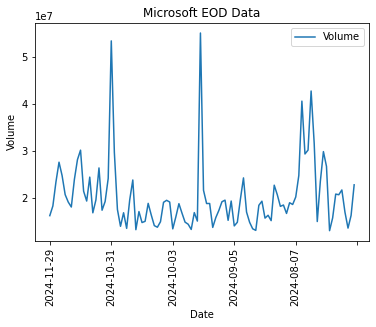

In [12]:
df.plot.line('short_date', 'volume')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Microsoft EOD Data')

# plt.legend(title='')
plt.legend(labels=['Volume'])

numbers:
    highest volume
    lowest volume
    highest price
    lowest price
    
over time:
    closing versus opening
    volume
    
averages (over different periods):
    volume
    high
    low
    closing
last week
last month

In [13]:
df['volume'].max()

55155300.0

In [14]:
df[['volume', 'short_date']].sort_values('volume', ascending=False)

,volume,short_date
49,55155300.0,2024-09-20
20,53473867.0,2024-10-31
85,42806400.0,2024-07-31
82,40652000.0,2024-08-05
86,31694300.0,2024-07-30
...,...,...
40,13460138.0,2024-10-03
46,13335000.0,2024-09-25
28,13284766.0,2024-10-21
67,13134700.0,2024-08-26


In [15]:
df[['volume', 'short_date']].sort_values('volume', ascending=True).head(1)

,volume,short_date
91,13075000.0,2024-07-23


In [16]:
df[['adj_high', 'short_date']].sort_values('adj_high', ascending=False)

,adj_high,short_date
99,464.78,2024-07-11
97,457.26,2024-07-15
98,456.36,2024-07-12
96,454.30,2024-07-16
91,448.39,2024-07-23
...,...,...
58,408.65,2024-09-09
78,408.05,2024-08-09
79,405.86,2024-08-08
81,405.67,2024-08-06


In [17]:
df[['adj_high', 'short_date']].sort_values('adj_high', ascending=True).head(1)

,adj_high,short_date
82,401.04,2024-08-05


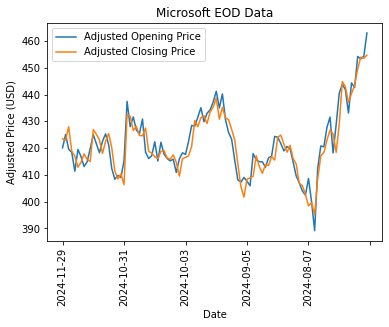

In [18]:
df.plot.line('short_date', y=['adj_open', 'adj_close'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Adjusted Price (USD)')
plt.title('Microsoft EOD Data')
plt.legend(labels=['Adjusted Opening Price', 'Adjusted Closing Price'])

In [19]:
df['volume'].mean()

20284888.0

In [20]:
df['adj_high'].mean()

425.37820500000015

In [21]:
df['adj_low'].mean()

417.9611310000001

In [22]:
df['adj_close'].mean()

421.5292